# Manipulating & Comparing Arrays

In [1]:
import numpy as np

In [2]:
one_dimensional = np.array([2,4,6])
one_dimensional

array([2, 4, 6])

In [4]:
placeholder_ones = np.ones(3)
placeholder_ones

array([1., 1., 1.])

In [5]:
one_dimensional + placeholder_ones

array([3., 5., 7.])

In [6]:
one_dimensional - placeholder_ones

array([1., 3., 5.])

In [7]:
one_dimensional * placeholder_ones

array([2., 4., 6.])

In [8]:
one_dimensional / placeholder_ones

array([2., 4., 6.])

In [3]:
two_dimensional = np.array([
    [2,5,10],
    [5,22,9]
])
two_dimensional

array([[ 2,  5, 10],
       [ 5, 22,  9]])

In [10]:
one_dimensional * two_dimensional

array([[ 4, 20, 60],
       [10, 88, 54]])

Numpy uses broadcasting to make arithmetic operation fast.

> The term broadcasting describes how numpy treats arrays with different shapes during arithmetic operations. Subject to certain constraints, the smaller array is “broadcast” across the larger array so that they have compatible shapes. Broadcasting provides a means of vectorizing array operations so that looping occurs in C instead of Python.

In [4]:
three_dimensional = np.array([
    [
        [1,2,3],
        [4,5,6],
        [7,8,9]
    ],
    [
        [1,2,3],
        [4,5,6],
        [7,8,9]
    ]
])
three_dimensional

array([[[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]],

       [[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]]])

In [14]:
two_dimensional * three_dimensional

ValueError: operands could not be broadcast together with shapes (2,3) (2,3,3) 

The reason the previous multiplication fails is because the shapes don't match.
> When operating on two arrays, NumPy compares their shapes element-wise. It starts with 
> the trailing dimensions, and works its way forward. Two dimensions are compatible when
>
> 1. they are equal, or
> 2. one of them is 1
>
> If these conditions are not met, a ValueError: operands could not be broadcast together
> exception is thrown, indicating that the arrays have incompatible shapes.

In [18]:
one_dimensional / two_dimensional

array([[1.        , 0.8       , 0.6       ],
       [0.4       , 0.18181818, 0.66666667]])

In [19]:
one_dimensional // two_dimensional

array([[1, 0, 0],
       [0, 0, 0]])

In [17]:
one_dimensional.shape, two_dimensional.shape, three_dimensional.shape

((3,), (2, 3), (2, 3, 3))

In [21]:
two_dimensional ** 4

array([[    16,    625,  10000],
       [   625, 234256,   6561]])

In [22]:
np.add(one_dimensional, two_dimensional), np.subtract(one_dimensional, two_dimensional)

(array([[ 4,  9, 16],
        [ 7, 26, 15]]),
 array([[  0,  -1,  -4],
        [ -3, -18,  -3]]))

In [26]:
np.exp(one_dimensional), np.log(one_dimensional)

(array([  7.3890561 ,  54.59815003, 403.42879349]),
 array([0.69314718, 1.38629436, 1.79175947]))

## Aggregation
peforming the same operation on a number of things

In [2]:
example_list = np.random.random(100000)
example_list[:10]

array([0.52718959, 0.83555799, 0.84573402, 0.80425638, 0.0264922 ,
       0.07859442, 0.02743713, 0.85900076, 0.73887777, 0.43756716])

In [4]:
sum(example_list), np.sum(example_list)

(50007.61446777819, 50007.614467777974)

Python and Numpy have a lot of functions nad methods that overlap and do the same. Generally, we want to use Python functions on Python data structures and Numpy methods on Numpy data structures.

In [5]:
example_list.size

100000

In [6]:
%timeit sum(example_list)
%timeit np.sum(example_list)

27.6 ms ± 393 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
51 µs ± 618 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [7]:
np.mean(example_list), np.max(example_list), np.min(example_list)

(0.5000761446777797, 0.999996218845058, 9.384406280066315e-06)

In [9]:
np.std(example_list), np.var(example_list)

(0.28850579600371357, 0.08323559432773638)

We can calculate the Standard daviation by calculating the square root of the variance.

In [10]:
np.sqrt(np.var(example_list))

0.28850579600371357

## Standard Variation

`std` refers to the Standard deviation or how spread out a group of numbers is from the mean. `var` refers to the variance which is the average degree to which each number is different.

In [2]:
high_variance = np.array([1, 100, 1000, 10000, 100000])
low_variance = np.array([2,4,6,8,10])

In [3]:
np.var(high_variance), np.var(low_variance)

(1526464712.1600003, 8.0)

In [4]:
np.std(high_variance), np.std(low_variance)

(39069.997596109475, 2.8284271247461903)

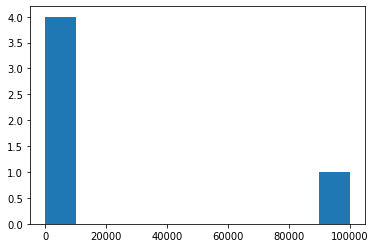

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(high_variance)
plt.show()

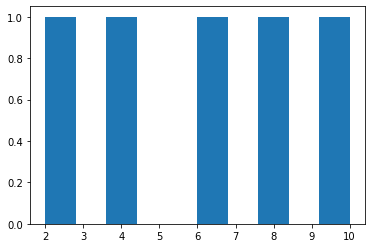

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(low_variance)
plt.show()

## Reshape & Transpose

In [8]:
two_dimensional, three_dimensional

(array([[ 2,  5, 10],
        [ 5, 22,  9]]),
 array([[[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]],
 
        [[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]]]))

In [9]:
two_dimensional.shape, three_dimensional.shape

((2, 3), (2, 3, 3))

In [10]:
two_dimensional * three_dimensional

ValueError: operands could not be broadcast together with shapes (2,3) (2,3,3) 

The broadcast rule doesn't allow us to multiply two arrays with uncompatible shapes. In order to be compatible, two shapes must be either equal `(2,3) and (2,3)` or one of them has to be one `(2,3,3) and (2,3,1)`. We can archive this using numpy's `reshape` method.

In [14]:
two_dimensional.reshape(2,3,1).shape, three_dimensional.shape

((2, 3, 1), (2, 3, 3))

In [15]:
two_dimensional_reshape = two_dimensional.reshape(2,3,1)
two_dimensional_reshape

array([[[ 2],
        [ 5],
        [10]],

       [[ 5],
        [22],
        [ 9]]])

In [16]:
two_dimensional_reshape * three_dimensional

array([[[  2,   4,   6],
        [ 20,  25,  30],
        [ 70,  80,  90]],

       [[  5,  10,  15],
        [ 88, 110, 132],
        [ 63,  72,  81]]])

In [18]:
two_dimensional.T, two_dimensional

(array([[ 2,  5],
        [ 5, 22],
        [10,  9]]),
 array([[ 2,  5, 10],
        [ 5, 22,  9]]))

In [19]:
two_dimensional.T.shape, two_dimensional.shape

((3, 2), (2, 3))

## Dot Product

In mathematics, the dot product or scalar product is an algebraic operation that takes two equal-length sequences of numbers (usually coordinate vectors) and returns a single number.

In [4]:
matrix1 = np.random.randint(10, size=(5,3))
matrix2 = np.random.randint(10, size=(5,3))

matrix1, matrix1.shape, matrix2, matrix2.shape

(array([[5, 3, 1],
        [2, 2, 7],
        [0, 1, 7],
        [2, 1, 0],
        [0, 7, 3]]),
 (5, 3),
 array([[8, 0, 1],
        [8, 0, 2],
        [5, 8, 6],
        [4, 9, 6],
        [0, 5, 0]]),
 (5, 3))

In [5]:
matrix1 * matrix2

array([[40,  0,  1],
       [16,  0, 14],
       [ 0,  8, 42],
       [ 8,  9,  0],
       [ 0, 35,  0]])

In [7]:
np.dot(matrix1, matrix2)

ValueError: shapes (5,3) and (5,3) not aligned: 3 (dim 1) != 5 (dim 0)

In [10]:
matrix3 = np.dot(matrix1, matrix2.T)
matrix3, matrix3.shape

(array([[41, 42, 55, 53, 15],
        [23, 30, 68, 68, 10],
        [ 7, 14, 50, 51,  5],
        [16, 16, 18, 17,  5],
        [ 3,  6, 74, 81, 35]]),
 (5, 5))